In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

In [6]:
cop = pd.read_csv(r'C:/Users/shant/Dropbox/Shan-for-Chesler/Galvanize/Pandas/CCRB-Complaint-Data_202007261025/allegations_20200726939.csv', delimiter = ',', header = 0)

In [64]:
cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32894 entries, 0 to 33357
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             32894 non-null  int64  
 1   first_name                32894 non-null  object 
 2   last_name                 32894 non-null  object 
 3   command_now               32894 non-null  object 
 4   complaint_id              32894 non-null  int64  
 5   month_received            32894 non-null  int64  
 6   year_received             32894 non-null  int64  
 7   month_closed              32894 non-null  int64  
 8   year_closed               32894 non-null  int64  
 9   command_at_incident       31758 non-null  object 
 10  rank_abbrev_incident      32894 non-null  object 
 11  rank_abbrev_now           32894 non-null  object 
 12  rank_now                  32894 non-null  object 
 13  rank_incident             32894 non-null  object 
 14  mos_et

In [8]:
cop.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition'],
      dtype='object')

In [9]:
pre = cop.groupby('precinct') 
pre.mean().round(0)

unique_mos_id  complaint_id  month_received  year_received  \
precinct                                                               
0.0             22245.0        2571.0             5.0         1996.0   
1.0             16131.0       27409.0             8.0         2012.0   
5.0             14761.0       26702.0             6.0         2012.0   
6.0             15096.0       27280.0             6.0         2012.0   
7.0             16037.0       24248.0             6.0         2011.0   
...                 ...           ...             ...            ...   
120.0           20306.0       25767.0             6.0         2012.0   
121.0           20201.0       33019.0             6.0         2015.0   
122.0           20639.0       22924.0             7.0         2010.0   
123.0           20914.0       32399.0             6.0         2015.0   
1000.0          17607.0       40622.0            10.0         2018.0   

          month_closed  year_closed  mos_age_incident  \
precinct                                                
0.0                5.0       1997.0              29.0   
1.0                6.0       2013.0              33.0   
5.0                7.0       2013.0              34.0   
6.0                7.0       2013.0              33.0   
7.0                6.0       2012.0              33.0   
...                ...          ...               ...   
120.0              6.0       2013.0              32.0   
121.0              7.0       2016.0              33.0   
122.0              7.0       2011.0              33.0   
123.0              5.0       2015.0              34.0   
1000.0             5.0       2019.0              48.0   

          complainant_age_incident  
precinct                            
0.0                           33.0  
1.0                           36.0  
5.0                           31.0  
6.0                           40.0  
7.0                           31.0  
...                            ...  
120.0                         32.0  
121.0                         34.0  
122.0                         33.0  
123.0                         39.0  
1000.0                        32.0  

[79 rows x 8 columns]

In [6]:
####TA= TOTAL ALLEGATIONS BY TYPE

In [10]:
ta = cop.allegation.value_counts()
ta

Physical force                              4849
Word                                        3942
Stop                                        2300
Search (of person)                          2047
Frisk                                       1926
                                            ... 
Failed to Obtain Language Interpretation       2
Oriental                                       1
Sexist Remark                                  1
Questioned immigration status                  1
Other Asian                                    1
Name: allegation, Length: 115, dtype: int64

In [8]:
#### PA = Allegation Count Per Precinct

In [11]:
pa = pre['allegation'].value_counts()
pa

precinct  allegation          
0.0       Other - Force           4
          Curse                   3
          Nasty Words             2
          Push/Shove              2
          Threat of force         2
                                 ..
123.0     Strip-searched          1
          Threat of force         1
          Threat to notify ACS    1
1000.0    Word                    2
          Action                  1
Name: allegation, Length: 3820, dtype: int64

In [12]:
pa_type = pre['fado_type'].value_counts()
pa_type

precinct  fado_type         
0.0       Force                  8
          Abuse of Authority     7
          Discourtesy            6
1.0       Abuse of Authority    84
          Force                 54
                                ..
123.0     Abuse of Authority    88
          Discourtesy           15
          Force                  6
          Offensive Language     3
1000.0    Discourtesy            3
Name: fado_type, Length: 310, dtype: int64

In [11]:
# df = px.data.gapminder().query("year==2007")
# fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
#                      hover_name="country", size="pop",
#                      projection="natural earth")
# fig.show()

In [13]:
cop.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition'],
      dtype='object')

In [13]:
#### Function to determine borough per allegation 
# separated boroughs base don date here http://wgetsnaps.github.io/nyc.gov--nypd-videos/html/nypd/html/home/precincts.shtml

In [14]:
def pre_bor(precinct):
    if precinct <= 39:
        return "Manhattan"
    elif precinct >= 40 and precinct < 59:
        return "Bronx"
    elif precinct >=60 and precinct < 99:
        return "Brooklyn"
    elif precinct >= 100 and precinct < 119:
        return "Queens"
    elif precinct >= 120 and precinct < 125:
        return "Staten Island"
    else:
        return "unknown"
pre_bor(50)

'Bronx'

In [16]:
cop['borough'] = np.vectorize(pre_bor)(cop['precinct'])

In [18]:
cop.tail(50)
#helps to confirm the pre_bor function is working correctly

unique_mos_id first_name  last_name command_now  complaint_id  \
33308           9856     Daniel      Zollo     077 PCT         17560   
33309           9856     Daniel      Zollo     077 PCT         17848   
33310           9856     Daniel      Zollo     077 PCT         18754   
33311           9856     Daniel      Zollo     077 PCT         19009   
33312           9856     Daniel      Zollo     077 PCT         20709   
33313           9856     Daniel      Zollo     077 PCT         20709   
33314           9856     Daniel      Zollo     077 PCT         20709   
33315           9856     Daniel      Zollo     077 PCT         20709   
33316           9856     Daniel      Zollo     077 PCT         20786   
33317           9856     Daniel      Zollo     077 PCT         20786   
33318           9856     Daniel      Zollo     077 PCT         20786   
33319           9856     Daniel      Zollo     077 PCT         20786   
33320           9856     Daniel      Zollo     077 PCT         23623   
33321           9879     Nasser    Alsubai     078 PCT         42335   
33322           9882     Yvonne       Baez     078 PCT          6388   
33323           9882     Yvonne       Baez     078 PCT          6388   
33324           9886    Anthony       Baty     078 PCT         42335   
33325           9902     Krysta    Cosenza     078 PCT         42335   
33326           9911     Thomas  Dicamillo     078 PCT         42328   
33327           9911     Thomas  Dicamillo     078 PCT         42328   
33328           9911     Thomas  Dicamillo     078 PCT         42328   
33329           9953    Shapiro    Lecorps     078 PCT         14955   
33330           9953    Shapiro    Lecorps     078 PCT         14955   
33331           9953    Shapiro    Lecorps     078 PCT         15545   
33332           9953    Shapiro    Lecorps     078 PCT         15545   
33333           9965    Colbert     Martin     078 PCT          9018   
33334           9965    Colbert     Martin     078 PCT          9018   
33335           9965    Colbert     Martin     078 PCT         39785   
33336           9974       Alex  Merizalde     078 PCT         43320   
33337           9974       Alex  Merizalde     078 PCT         43320   
33338           9974       Alex  Merizalde     078 PCT         43320   
33339           9974       Alex  Merizalde     078 PCT         43320   
33340           9975       Inna  Miroshnyk     078 PCT         42328   
33341           9975       Inna  Miroshnyk     078 PCT         42328   
33342           9979   Novaidul       Neon     078 PCT         29855   
33343           9979   Novaidul       Neon     078 PCT         36320   
33344           9979   Novaidul       Neon     078 PCT         36320   
33345           9984     Hassan      Paris     078 PCT          9410   
33346           9984     Hassan      Paris     078 PCT          9410   
33347           9984     Hassan      Paris     078 PCT          9410   
33348           9984     Hassan      Paris     078 PCT         42835   
33349           9984     Hassan      Paris     078 PCT         42835   
33350           9984     Hassan      Paris     078 PCT         42835   
33351           9984     Hassan      Paris     078 PCT         42835   
33352           9992     Tomasz   Pulawski     078 PCT         35671   
33353           9992     Tomasz   Pulawski     078 PCT         35671   
33354           9992     Tomasz   Pulawski     078 PCT         35671   
33355           9992     Tomasz   Pulawski     078 PCT         35671   
33356           9992     Tomasz   Pulawski     078 PCT         35671   
33357           9992     Tomasz   Pulawski     078 PCT         35671   

       month_received  year_received  month_closed  year_closed  \
33308               2           2009            12         2009   
33309               3           2009             2         2010   
33310               8           2009             7         2010   
33311               9           2009             8         2010   

In [48]:
boro = cop.borough.value_counts()
boro

Brooklyn         12755
Bronx             8329
Manhattan         6011
Queens            4676
Staten Island     1560
unknown             27
Name: borough, dtype: int64

In [36]:
c=cop.precinct.value_counts()
c
#shows the top 5 most offending precincts by way of precinct appearance in database

75.0      2172
73.0      1163
44.0      1139
46.0      1120
67.0      1119
          ... 
17.0        76
111.0       37
0.0         21
22.0        12
1000.0       3
Name: precinct, Length: 79, dtype: int64

In [18]:
cop.dtypes

unique_mos_id                 int64
first_name                   object
last_name                    object
command_now                  object
complaint_id                  int64
month_received                int64
year_received                 int64
month_closed                  int64
year_closed                   int64
command_at_incident          object
rank_abbrev_incident         object
rank_abbrev_now              object
rank_now                     object
rank_incident                object
mos_ethnicity                object
mos_gender                   object
mos_age_incident              int64
complainant_ethnicity        object
complainant_gender           object
complainant_age_incident    float64
fado_type                    object
allegation                   object
precinct                    float64
contact_reason               object
outcome_description          object
board_disposition            object
borough                      object
dtype: object

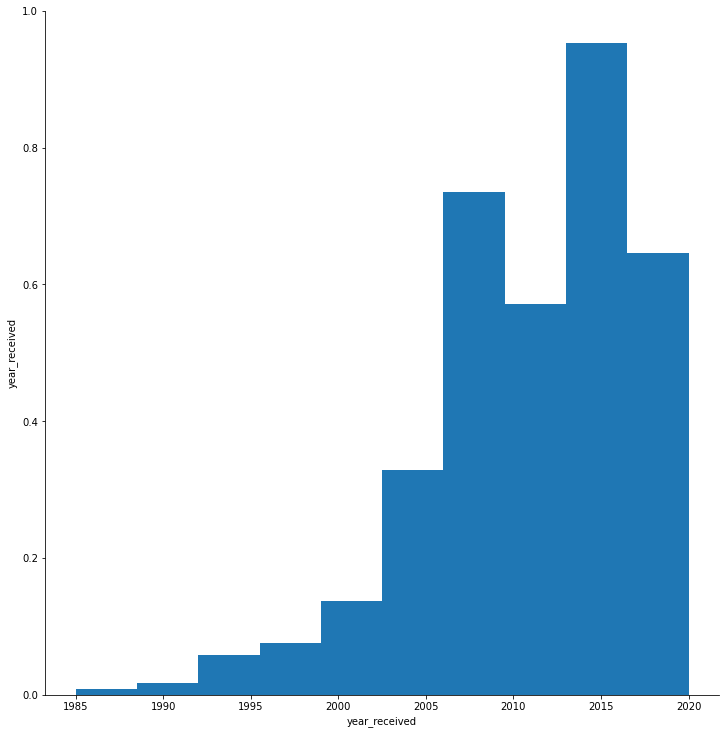

In [19]:
sns.pairplot(cop[['allegation','year_received']], plot_kws = {"color": "green"}, height = 10)

In [1]:
ax = sns.lineplot(x = 'year_received', y = 'borough', data = cop, palette = ["red", "green", "blue", "hotpink", "teal", "yellow"], ci = False) 

NameError: name 'sns' is not defined

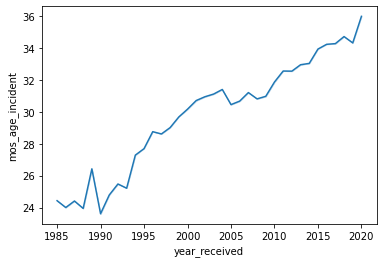

In [21]:
ax = sns.lineplot(x = 'year_received', y = 'mos_age_incident', data = cop, palette = ["red", "green", "blue", "hotpink"], ci = False)


In [22]:
# cop['Complete_Date_Received'] = pd.to_datetime(cop[['month_received', 'year_received', 'month_received']])

In [ ]:
pa = pa
pa
print (type(pa))

In [45]:
allegation = cop.allegation.value_counts()
allegation

Physical force                   4849
Word                             3942
Stop                             2300
Search (of person)               2047
Frisk                            1926
                                 ... 
Jewish                              2
Sexist Remark                       1
Other Asian                         1
Questioned immigration status       1
Oriental                            1
Name: allegation, Length: 115, dtype: int64

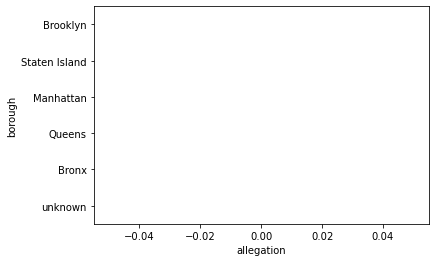

In [47]:
sns.swarmplot(x=(allegation), y='borough', data=cop, 
              palette= 'cool')

In [23]:
def may(mayor):
    if mayor >= 1994 and mayor <= 2001:
        return "Giuliani"
    elif mayor >= 2002 and mayor <= 2013:
        return "Bloomberg"
    elif mayor >= 2014 and mayor <= 2020:
        return "DeBlasio"
    else:
        return "unknown"
may(2012)

'Bloomberg'

In [27]:
cop['mayor'] = np.vectorize(may)(cop['year_received'])

In [28]:
cop

unique_mos_id first_name last_name command_now  complaint_id  \
0              10004   Jonathan      Ruiz     078 PCT         42835   
1              10007       John     Sears     078 PCT         24601   
2              10007       John     Sears     078 PCT         24601   
3              10007       John     Sears     078 PCT         26146   
4              10009      Noemi    Sierra     078 PCT         40253   
...              ...        ...       ...         ...           ...   
33353           9992     Tomasz  Pulawski     078 PCT         35671   
33354           9992     Tomasz  Pulawski     078 PCT         35671   
33355           9992     Tomasz  Pulawski     078 PCT         35671   
33356           9992     Tomasz  Pulawski     078 PCT         35671   
33357           9992     Tomasz  Pulawski     078 PCT         35671   

       month_received  year_received  month_closed  year_closed  \
0                   7           2019             5         2020   
1                  11           2011             8         2012   
2                  11           2011             8         2012   
3                   7           2012             9         2013   
4                   8           2018             2         2019   
...               ...            ...           ...          ...   
33353               8           2016             2         2017   
33354               8           2016             2         2017   
33355               8           2016             2         2017   
33356               8           2016             2         2017   
33357               8           2016             2         2017   

      command_at_incident  ... complainant_gender complainant_age_incident  \
0                 078 PCT  ...             Female                     38.0   
1                    PBBS  ...               Male                     26.0   
2                    PBBS  ...               Male                     26.0   
3                    PBBS  ...               Male                     45.0   
4                 078 PCT  ...                NaN                     16.0   
...                   ...  ...                ...                      ...   
33353             066 PCT  ...               Male                     21.0   
33354             066 PCT  ...               Male                     21.0   
33355             066 PCT  ...               Male                     21.0   
33356             066 PCT  ...               Male                     21.0   
33357             066 PCT  ...               Male                     21.0   

                fado_type                    allegation precinct  \
0      Abuse of Authority  Failure to provide RTKA card     78.0   
1             Discourtesy                        Action     67.0   
2      Offensive Language                          Race     67.0   
3      Abuse of Authority                      Question     67.0   
4                   Force                Physical force     67.0   
...                   ...                           ...      ...   
33353         Discourtesy                          Word     66.0   
33354  Abuse of Authority   Interference with recording     66.0   
33355  Abuse of Authority            Search (of person)     66.0   
33356  Abuse of Authority                Vehicle search     66.0   
33357  Abuse of Authority                         Frisk     66.0   

                                     contact_reason  \
0                           Report-domestic dispute   
1                                  Moving violation   
2                                  Moving violation   
3      PD suspected C/V of violation/crime - street   
4                                    Report-dispute   
...                                             ...   
33353                              Moving violation   
33354                              Moving violation   
33355                              Moving violation   
33356                              Moving vio

In [37]:
cop = cop[cop.mayor != 'unknown']
#dataframe "cop" revised to delete all unknown alllegation with no year to correspond with mayoral term

In [39]:
cop
#dataframe "cop" revised to delete all unknown alllegation with no year to correspond with mayoral term

unique_mos_id first_name last_name command_now  complaint_id  \
0              10004   Jonathan      Ruiz     078 PCT         42835   
1              10007       John     Sears     078 PCT         24601   
2              10007       John     Sears     078 PCT         24601   
3              10007       John     Sears     078 PCT         26146   
4              10009      Noemi    Sierra     078 PCT         40253   
...              ...        ...       ...         ...           ...   
33353           9992     Tomasz  Pulawski     078 PCT         35671   
33354           9992     Tomasz  Pulawski     078 PCT         35671   
33355           9992     Tomasz  Pulawski     078 PCT         35671   
33356           9992     Tomasz  Pulawski     078 PCT         35671   
33357           9992     Tomasz  Pulawski     078 PCT         35671   

       month_received  year_received  month_closed  year_closed  \
0                   7           2019             5         2020   
1                  11           2011             8         2012   
2                  11           2011             8         2012   
3                   7           2012             9         2013   
4                   8           2018             2         2019   
...               ...            ...           ...          ...   
33353               8           2016             2         2017   
33354               8           2016             2         2017   
33355               8           2016             2         2017   
33356               8           2016             2         2017   
33357               8           2016             2         2017   

      command_at_incident  ... complainant_gender complainant_age_incident  \
0                 078 PCT  ...             Female                     38.0   
1                    PBBS  ...               Male                     26.0   
2                    PBBS  ...               Male                     26.0   
3                    PBBS  ...               Male                     45.0   
4                 078 PCT  ...                NaN                     16.0   
...                   ...  ...                ...                      ...   
33353             066 PCT  ...               Male                     21.0   
33354             066 PCT  ...               Male                     21.0   
33355             066 PCT  ...               Male                     21.0   
33356             066 PCT  ...               Male                     21.0   
33357             066 PCT  ...               Male                     21.0   

                fado_type                    allegation precinct  \
0      Abuse of Authority  Failure to provide RTKA card     78.0   
1             Discourtesy                        Action     67.0   
2      Offensive Language                          Race     67.0   
3      Abuse of Authority                      Question     67.0   
4                   Force                Physical force     67.0   
...                   ...                           ...      ...   
33353         Discourtesy                          Word     66.0   
33354  Abuse of Authority   Interference with recording     66.0   
33355  Abuse of Authority            Search (of person)     66.0   
33356  Abuse of Authority                Vehicle search     66.0   
33357  Abuse of Authority                         Frisk     66.0   

                                     contact_reason  \
0                           Report-domestic dispute   
1                                  Moving violation   
2                                  Moving violation   
3      PD suspected C/V of violation/crime - street   
4                                    Report-dispute   
...                                             ...   
33353                              Moving violation   
33354                              Moving violation   
33355                              Moving violation   
33356                              Moving vio

In [45]:
cop = cop[(cop['complainant_age_incident'] >0) | (cop['complainant_age_incident'].isna())]
cop.shape

(32917, 28)

In [46]:
cop = cop[cop['precinct'].notna()]
cop.shape

(32917, 28)

In [50]:
cop = cop[(cop['complainant_age_incident'] > 10) | (cop['complainant_age_incident'].isna())]
cop.shape

(32894, 28)

In [ ]:
#23 values drop for complaintant age 10yrs or under
#416 values dropped for no corresponding mayor

In [ ]:
#find the incident:accountability rate over mayoral terms 


In [59]:
cop['complainant_age_incident'].fillna((cop['complainant_age_incident'].mean()), inplace=True)
cop.shape
#replaced nulls witht the mean age 

(32894, 28)

In [60]:
cop.reset_index()

index  unique_mos_id first_name last_name command_now  complaint_id  \
0          0          10004   Jonathan      Ruiz     078 PCT         42835   
1          1          10007       John     Sears     078 PCT         24601   
2          2          10007       John     Sears     078 PCT         24601   
3          3          10007       John     Sears     078 PCT         26146   
4          4          10009      Noemi    Sierra     078 PCT         40253   
...      ...            ...        ...       ...         ...           ...   
32889  33353           9992     Tomasz  Pulawski     078 PCT         35671   
32890  33354           9992     Tomasz  Pulawski     078 PCT         35671   
32891  33355           9992     Tomasz  Pulawski     078 PCT         35671   
32892  33356           9992     Tomasz  Pulawski     078 PCT         35671   
32893  33357           9992     Tomasz  Pulawski     078 PCT         35671   

       month_received  year_received  month_closed  year_closed  ...  \
0                   7           2019             5         2020  ...   
1                  11           2011             8         2012  ...   
2                  11           2011             8         2012  ...   
3                   7           2012             9         2013  ...   
4                   8           2018             2         2019  ...   
...               ...            ...           ...          ...  ...   
32889               8           2016             2         2017  ...   
32890               8           2016             2         2017  ...   
32891               8           2016             2         2017  ...   
32892               8           2016             2         2017  ...   
32893               8           2016             2         2017  ...   

      complainant_gender complainant_age_incident           fado_type  \
0                 Female                     38.0  Abuse of Authority   
1                   Male                     26.0         Discourtesy   
2                   Male                     26.0  Offensive Language   
3                   Male                     45.0  Abuse of Authority   
4                    NaN                     16.0               Force   
...                  ...                      ...                 ...   
32889               Male                     21.0         Discourtesy   
32890               Male                     21.0  Abuse of Authority   
32891               Male                     21.0  Abuse of Authority   
32892               Male                     21.0  Abuse of Authority   
32893               Male                     21.0  Abuse of Authority   

                         allegation precinct  \
0      Failure to provide RTKA card     78.0   
1                            Action     67.0   
2                              Race     67.0   
3                          Question     67.0   
4                    Physical force     67.0   
...                             ...      ...   
32889                          Word     66.0   
32890   Interference with recording     66.0   
32891            Search (of person)     66.0   
32892                Vehicle search     66.0   
32893                         Frisk     66.0   

                                     contact_reason  \
0                           Report-domestic dispute   
1                                  Moving violation   
2                                  Moving violation   
3      PD suspected C/V of violation/crime - street   
4                                    Report-dispute   
...                                             ...   
32889                              Moving violation   
32890                              Moving violation   
32891                              Moving violation   
32892                              Moving violation   
32893                              Moving violation   

                    outcome_description  \
0      No arrest made or summons issued   
1   

In [62]:
cop
#Old index dropped

unique_mos_id first_name last_name command_now  complaint_id  \
0              10004   Jonathan      Ruiz     078 PCT         42835   
1              10007       John     Sears     078 PCT         24601   
2              10007       John     Sears     078 PCT         24601   
3              10007       John     Sears     078 PCT         26146   
4              10009      Noemi    Sierra     078 PCT         40253   
...              ...        ...       ...         ...           ...   
33353           9992     Tomasz  Pulawski     078 PCT         35671   
33354           9992     Tomasz  Pulawski     078 PCT         35671   
33355           9992     Tomasz  Pulawski     078 PCT         35671   
33356           9992     Tomasz  Pulawski     078 PCT         35671   
33357           9992     Tomasz  Pulawski     078 PCT         35671   

       month_received  year_received  month_closed  year_closed  \
0                   7           2019             5         2020   
1                  11           2011             8         2012   
2                  11           2011             8         2012   
3                   7           2012             9         2013   
4                   8           2018             2         2019   
...               ...            ...           ...          ...   
33353               8           2016             2         2017   
33354               8           2016             2         2017   
33355               8           2016             2         2017   
33356               8           2016             2         2017   
33357               8           2016             2         2017   

      command_at_incident  ... complainant_gender complainant_age_incident  \
0                 078 PCT  ...             Female                     38.0   
1                    PBBS  ...               Male                     26.0   
2                    PBBS  ...               Male                     26.0   
3                    PBBS  ...               Male                     45.0   
4                 078 PCT  ...                NaN                     16.0   
...                   ...  ...                ...                      ...   
33353             066 PCT  ...               Male                     21.0   
33354             066 PCT  ...               Male                     21.0   
33355             066 PCT  ...               Male                     21.0   
33356             066 PCT  ...               Male                     21.0   
33357             066 PCT  ...               Male                     21.0   

                fado_type                    allegation precinct  \
0      Abuse of Authority  Failure to provide RTKA card     78.0   
1             Discourtesy                        Action     67.0   
2      Offensive Language                          Race     67.0   
3      Abuse of Authority                      Question     67.0   
4                   Force                Physical force     67.0   
...                   ...                           ...      ...   
33353         Discourtesy                          Word     66.0   
33354  Abuse of Authority   Interference with recording     66.0   
33355  Abuse of Authority            Search (of person)     66.0   
33356  Abuse of Authority                Vehicle search     66.0   
33357  Abuse of Authority                         Frisk     66.0   

                                     contact_reason  \
0                           Report-domestic dispute   
1                                  Moving violation   
2                                  Moving violation   
3      PD suspected C/V of violation/crime - street   
4                                    Report-dispute   
...                                             ...   
33353                              Moving violation   
33354                              Moving violation   
33355                              Moving violation   
33356                              Moving vio

In [72]:
cop = cop[cop.allegation.str.contains('other')==False] 

In [74]:
cop.allegation = cop.allegation.str.lower()

In [76]:
cop.to_csv('cop_findings.csv', index=False)

In [68]:
#### DATA CLEANING FINISHED

In [77]:
cop.shape

(32010, 28)

In [ ]:
> plt.savefig("foo.png", Save transparent figure transparent=True)

In [78]:
cop.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition', 'borough', 'mayor'],
      dtype='object')

In [109]:
mayorS = cop.groupby(['mayor','precinct','allegation']).mean()
mayorS

unique_mos_id  \
mayor     precinct allegation                                             
Bloomberg 1.0      action                                  17783.500000   
                   frisk                                      56.500000   
                   frisk and/or search                     16214.500000   
                   gun drawn                               34930.000000   
                   nightstick as club (incl asp & baton)    2408.333333   
...                                                                 ...   
Giuliani  123.0    demeanor/tone                           19345.000000   
                   gun pointed                             21986.000000   
                   nasty words                             21986.000000   
                   retaliatory arrest                      19345.000000   
                   threat of force                         21986.000000   

                                                          complaint_id  \
mayor     precinct allegation                                            
Bloomberg 1.0      action                                 15951.000000   
                   frisk                                  28266.000000   
                   frisk and/or search                     5832.500000   
                   gun drawn                              12433.000000   
                   nightstick as club (incl asp & baton)  19101.666667   
...                                                                ...   
Giuliani  123.0    demeanor/tone                           4906.000000   
                   gun pointed                             2789.000000   
                   nasty words                             2789.000000   
                   retaliatory arrest                      5067.000000   
                   threat of force                         2789.000000   

                                                          month_received  \
mayor     precinct allegation                                              
Bloomberg 1.0      action                                       5.000000   
                   frisk                                       11.000000   
                   frisk and/or search                          3.000000   
                   gun drawn                                   11.000000   
                   nightstick as club (incl asp & baton)        6.333333   
...                                                                  ...   
Giuliani  123.0    demeanor/tone                                6.000000   
                   gun pointed                                  6.000000   
                   nasty words                                  6.000000   
                   retaliatory arrest                          10.000000   
                   threat of force                              6.000000   

                                                          year_received  \
mayor     precinct allegation                                             
Bloomberg 1.0      action                                        2008.0   
                   frisk                                         2012.5   
                   frisk and/or search                           2002.5   
                   gun drawn                                     2006.0   
                   nightstick as club (incl asp & baton)         2009.0   
...                                                                 ...   
Giuliani  123.0    demeanor/tone                                 2001.0   
                   gun pointed                                   1997.0   
                   nasty words                                   1997.0   
                   retaliatory arrest                            2001.0   
                   threat of force                               1997.0   

                                                          month_closed  \
mayor     precinct allegation                                            
Bloomb